In [ ]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import statistics 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 

In [ ]:
solution_file_suffix = 1 

#### File load functions 

In [ ]:
def load_training_data():
    dtype = {'date': 'datetime64'}
    train = pd.read_csv('train_set.csv', parse_dates=['date'])
    min_date = train['date'].min()
    max_date = train['date'].max()
    dates = pd.date_range(min_date, max_date, freq='D')
    hour = [np.arange(0,24)]*len(dates)
    train_ref = pd.DataFrame({'date': dates, 'hour': hour})
    train_ref = train_ref.explode('hour').reset_index(drop=True)
    train_final = pd.merge(train_ref, train, on=['date', 'hour'], how='left')
    train_final['demand'] = train_final['demand'].fillna(0)
    
    return train_final

def load_testing_data():
    dtype = {'date': 'datetime64'}
    test_final = pd.read_csv('test_set.csv', parse_dates=['date'])
    
    return test_final

#### Data utilities 

In [198]:
def assign_hour_type_arbit(x):
    hour_type = ''
    if x < 5:
        hour_type = 'blk1'
    elif x >= 5 & x < 10:
        hour_type = 'blk2'
    elif x >= 10 & x<= 20:
        hour_type = 'blk3'
    elif x > 20:
        hour_type = 'blk4'
    else:
        hour_type = 'invalid'

    return hour_type

def apply_hour_type(x, p25, p50, p75):
    if x <= p25:
        return 'hblk1'
    elif (x > p25) & (x <= p50):
        return 'hblk2'
    elif (x > p50) & (x <= p75):
        return 'hblk3'
    elif x > p75:
        return 'hblk4'
    else:
        return 'hblk5'

def apply_month_type(x, p25, p50, p75):
    if x <= p25:
        return 'mblk1'
    elif (x > p25) & (x <= p50):
        return 'mblk2'
    elif (x > p50) & (x <= p75):
        return 'mblk3'
    elif x > p75:
        return 'mblk4'
    else:
        return 'mblk5'

def apply_day_type(x, p25, p50, p75):
    if x <= p25:
        return 'dblk1'
    elif (x > p25) & (x <= p50):
        return 'dblk2'
    elif (x > p50) & (x <= p75):
        return 'dblk3'
    elif x > p75:
        return 'dblk4'
    else:
        return 'dblk5'

#### Model checking functions 

In [ ]:
def return_feature_functions(model):
    if model == 'm1':
        f1, f2 = derive_train_features_m1, derive_test_features_m1
    elif model == 'm2':
        f1, f2 = derive_train_features_m2, derive_test_features_m2
    elif model == 'm3':
        f1, f2 = derive_train_features_m3, derive_test_features_m3
    elif model == 'm4':
        f1, f2 = derive_train_features_m4, derive_test_features_m4
    elif model == 'm5':
        f1, f2 = derive_train_features_m5, derive_test_features_m5
    elif model == 'm6':
        f1, f2 = derive_train_features_m6, derive_test_features_m6
    elif model == 'm7':
        f1, f2 = derive_train_features_m7, derive_test_features_m7
    elif model == 'm8':
        f1, f2 = derive_train_features_m8, derive_test_features_m8
    elif model == 'm9':
        f1, f2 = derive_train_features_m9, derive_test_features_m9
    elif model == 'm10': 
        f1, f2 = derive_train_features_m10, derive_test_features_m10
        
    return f1, f2 

def plot_values(x, y):
    df = pd.DataFrame({'actual': x, 'pred': y})
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    df.plot(ax=axes[0], kind='scatter', x='actual', y='pred', grid=True, title='Comparision of actual vs. predicted')
    df['actual'].plot(ax=axes[1], kind='hist', grid=True, title='Distribution of actual values')
    df['pred'].plot(ax=axes[2], kind='hist', grid=True, title='Distribution of predicted values')
    plt.show()

def check_test_file(model, test): 
    global solution_file_suffix 
    test['demand'] = model.predict(test.drop(['date'], axis=1).replace([-np.inf, np.inf], np.nan).fillna(0))
    test[['date', 'hour', 'demand']].to_csv(f'''test_set_solution_{solution_file_suffix}.csv''', index=False)
    solution_file_suffix += 1 

def check_model(train, test):
    X = train.drop(columns=['date', 'demand'], axis=1)
    Y = train['demand']

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f'''Mean squared error: {round(mean_squared_error(y_test, y_pred, squared=False), 5)}''') 
    plot_values(y_test, y_pred)
    check_test_file(model, test)

### First model ( m1 )

#### Derive some time-based simple features 

In [205]:
def derive_train_features_m1():
    train_final = load_training_data()
    train_final['year'] = train_final['date'].dt.year
    train_final['month'] = train_final['date'].dt.month
    train_final['day'] = train_final['date'].dt.day
    train_final['day_of_week'] = train_final['date'].dt.weekday
    train_final['quarter'] = train_final['date'].dt.quarter 
    train_final['is_weekday'] = np.where(train_final['day_of_week'].isin([6,7]), 1, 0)
    train_final = train_final[['date', 'year', 'month', 'day', 'hour', 'day_of_week', 'quarter', 'is_weekday', 'demand']]
    
    return train_final

def derive_test_features_m1():
    test_final = load_testing_data()
    test_final['year'] = test_final['date'].dt.year
    test_final['month'] = test_final['date'].dt.month
    test_final['day'] = test_final['date'].dt.day
    test_final['day_of_week'] = test_final['date'].dt.weekday
    test_final['quarter'] = test_final['date'].dt.quarter 
    test_final['is_weekday'] = np.where(test_final['day_of_week'].isin([6,7]), 1, 0)
    test_final = test_final[['date', 'year', 'month', 'day', 'hour', 'day_of_week', 'quarter', 'is_weekday']]
    
    return test_final

#### Basic distribution checks 

In [177]:
train_final = derive_train_features_m1()

In [178]:
train_final.head()

,date,year,month,day,hour,day_of_week,quarter,is_weekday,demand
0,2018-08-18,2018,8,18,0,5,3,0,0.0
1,2018-08-18,2018,8,18,1,5,3,0,0.0
2,2018-08-18,2018,8,18,2,5,3,0,0.0
3,2018-08-18,2018,8,18,3,5,3,0,0.0
4,2018-08-18,2018,8,18,4,5,3,0,0.0


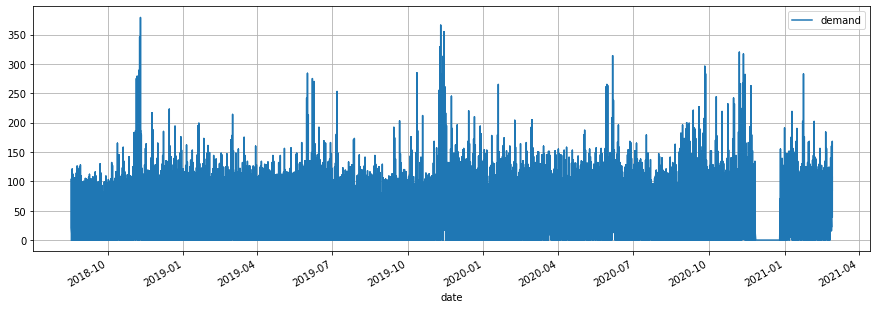

In [179]:
train_final.plot(x='date', y='demand', grid=True, figsize=(15, 5), kind='line')
plt.show()

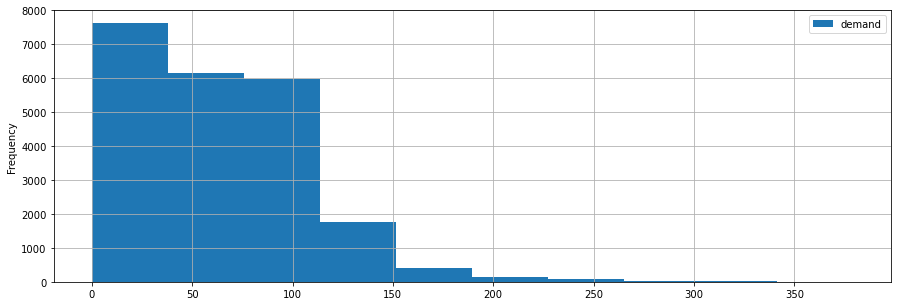

In [180]:
train_final.plot(grid=True, y='demand', kind='hist', figsize=(15, 5))
plt.show()

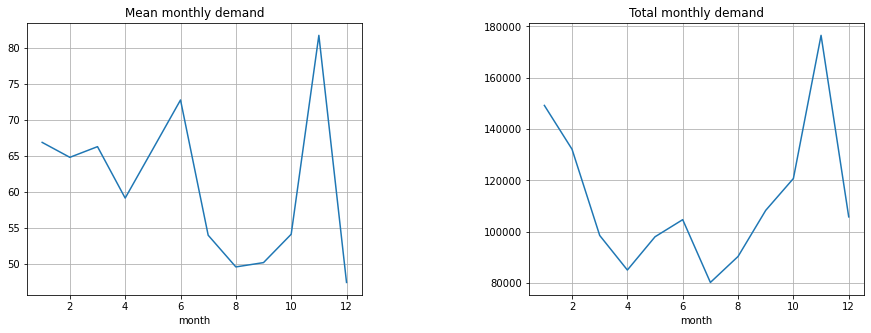

In [181]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5)
train_final.groupby(['month'])['demand'].mean().plot(ax=axes[0], grid=True, title='Mean monthly demand')
train_final.groupby(['month'])['demand'].sum().plot(ax=axes[1], grid=True, figsize=(15,5), title='Total monthly demand')
plt.show()

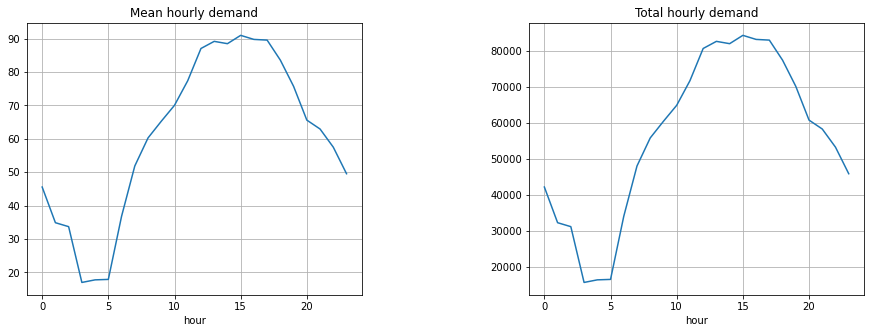

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
train_final.groupby(['hour'])['demand'].mean().plot(ax=axes[0], grid=True, figsize=(15,5), title='Mean hourly demand')
train_final.groupby(['hour'])['demand'].sum().plot(ax=axes[1], grid=True, figsize=(15,5), title='Total hourly demand')
plt.show()

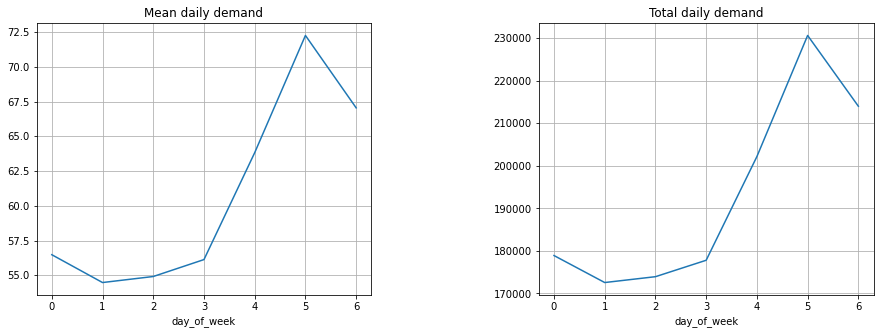

In [183]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
train_final.groupby(['day_of_week'])['demand'].mean().plot(ax=axes[0], grid=True, figsize=(15,5), title='Mean daily demand')
train_final.groupby(['day_of_week'])['demand'].sum().plot(ax=axes[1], grid=True, figsize=(15,5), title='Total daily demand')
plt.show()

In [119]:
train_final.drop(['date'], axis=1).corr() 

,year,month,day,day_of_week,quarter,is_weekday,demand
year,1.000000,-0.433275,-0.031491,0.004745,-0.416553,0.000066,0.064042
month,-0.433275,1.000000,0.016749,-0.006625,0.974868,0.001481,-0.067881
day,-0.031491,0.016749,1.000000,0.008751,0.019053,0.002337,-0.033392
day_of_week,0.004745,-0.006625,0.008751,1.000000,-0.009686,0.612783,0.115388
quarter,-0.416553,0.974868,0.019053,-0.009686,1.000000,-0.004121,-0.067073
is_weekday,0.000066,0.001481,0.002337,0.612783,-0.004121,1.000000,0.054605
demand,0.064042,-0.067881,-0.033392,0.115388,-0.067073,0.054605,1.000000


In [120]:
train_final.head()

,date,year,month,day,hour,day_of_week,quarter,is_weekday,demand
0,2018-08-18,2018,8,18,0,5,3,0,0.0
1,2018-08-18,2018,8,18,1,5,3,0,0.0
2,2018-08-18,2018,8,18,2,5,3,0,0.0
3,2018-08-18,2018,8,18,3,5,3,0,0.0
4,2018-08-18,2018,8,18,4,5,3,0,0.0


#### Check model 

Mean squared error: 43.72377


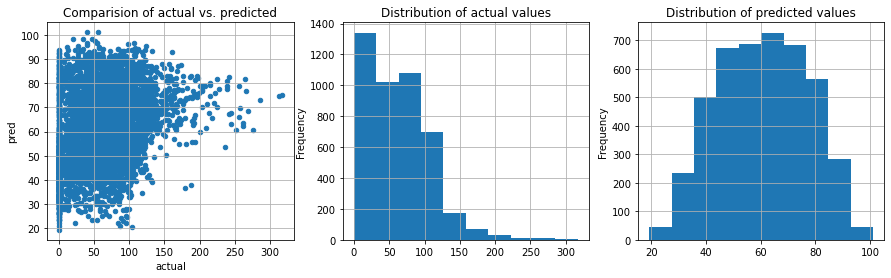

In [204]:
model_type = 'm1'
train_func, test_func = return_feature_functions(model_type)
train_final, test_final = train_func(), test_func()
check_model(train_final, test_final)

### Second Model (m2)

#### Derive features 

In [202]:
def derive_train_features_m2():
    train_final = load_training_data()
    train_final['year'] = train_final['date'].dt.year
    train_final['month'] = train_final['date'].dt.month
    train_final['day'] = train_final['date'].dt.day
    train_final['day_of_week'] = train_final['date'].dt.weekday
    train_final['quarter'] = train_final['date'].dt.quarter 
    train_final = train_final[['date', 'year', 'month', 'day', 'hour', 'day_of_week', 'quarter', 'demand']]
    
    return train_final

def derive_test_features_m2():
    test_final = load_testing_data()
    test_final['year'] = test_final['date'].dt.year
    test_final['month'] = test_final['date'].dt.month
    test_final['day'] = test_final['date'].dt.day
    test_final['day_of_week'] = test_final['date'].dt.weekday
    test_final['quarter'] = test_final['date'].dt.quarter 
    test_final['is_weekday'] = np.where(test_final['day_of_week'].isin([6,7]), 1, 0)
    test_final = test_final[['date', 'year', 'month', 'day', 'hour', 'day_of_week', 'quarter']]
    
    return test_final

#### Check model 

Mean squared error: 44.3329


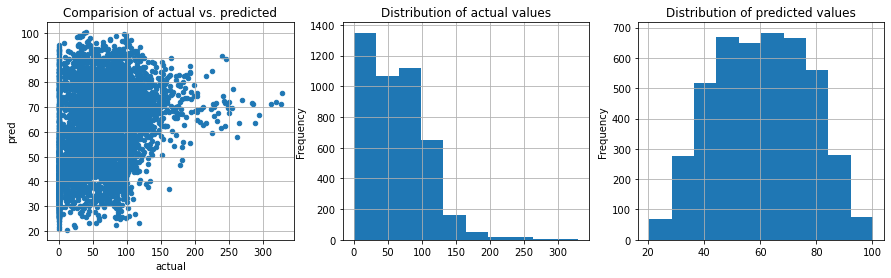

In [203]:
model_type = 'm2'
train_func, test_func = return_feature_functions(model_type)
train_final, test_final = train_func(), test_func()
check_model(train_final, test_final)

### Third model (m3) -- Invalid

#### Derive features 

In [ ]:
def derive_train_features_m3():
    train_final = load_training_data()
    train_final['year'] = train_final['date'].dt.year
    train_final['month'] = train_final['date'].dt.month
    train_final['day'] = train_final['date'].dt.day
    train_final['ma5_demand'] = train_final['demand'].shift(1).rolling(window=5).mean()
    train_final = train_final[['date', 'year', 'month', 'day', 'hour', 'ma5_demand', 'demand']].fillna(0)
    
    return train_final

def derive_test_features_m3():
    test_final = load_testing_data()
    test_final['year'] = test_final['date'].dt.year
    test_final['month'] = test_final['date'].dt.month
    test_final['day'] = test_final['date'].dt.day
    test_final['ma5_demand'] = train_final['demand'].shift(1).rolling(window=5).mean()
    test_final = test_final[['date', 'year', 'month', 'day', 'hour', 'ma5_demand']].fillna(0)
    
    return test_final

#### Check model 

In [ ]:
model_type = 'm3'
train_func, test_func = return_feature_functions(model_type)
train_final, test_final = train_func(), test_func()
check_model(train_final, test_final)

### Fourth model (m4) - Invalid 

#### Derive features 

In [ ]:
def derive_train_features_m4():
    train_final = load_training_data()
    train_final['ma5_demand'] = train_final['demand'].shift(1).rolling(window=5).mean()
    train_final['ma5_demand'] = train_final['ma5_demand'].fillna(0)
    train_final = train_final[['date', 'hour', 'ma5_demand', 'demand']]
    
    return train_final

def derive_test_features_m4():
    test_final = load_testing_data()
    test_final['ma5_demand'] = test_final['demand'].shift(1).rolling(window=5).mean()
    train_final['ma5_demand'] = test_final['ma5_demand'].fillna(0)
    test_final = test_final[['date', 'hour', 'ma5_demand']]
    
    return test_final

#### Check model 

In [ ]:
model_type = 'm4'
train_func, test_func = return_feature_functions(model_type)
train_final, test_final = train_func(), test_func()
check_model(train_final, test_final)

### Fifth model (m5)

#### Derive features 

In [200]:
def derive_train_features_m5():
    train_final = load_training_data()
    train_final['year'] = train_final['date'].dt.year
    train_final['month'] = train_final['date'].dt.month
    train_final['day'] = train_final['date'].dt.day
    train_final['day_of_week'] = train_final['date'].dt.weekday
    train_final['quarter'] = train_final['date'].dt.quarter 
    train_final['is_weekday'] = np.where(train_final['day_of_week'].isin([6,7]), 1, 0)
    train_final['hour_type'] = train_final['hour'].apply(lambda x: assign_hour_type_arbit(x))
    train_final = pd.get_dummies(train_final, columns=['hour_type'])
    
    return train_final

def derive_test_features_m5():
    test_final = load_testing_data()
    test_final['year'] = test_final['date'].dt.year
    test_final['month'] = test_final['date'].dt.month
    test_final['day'] = test_final['date'].dt.day
    test_final['day_of_week'] = test_final['date'].dt.weekday
    test_final['quarter'] = test_final['date'].dt.quarter 
    test_final['is_weekday'] = np.where(test_final['day_of_week'].isin([6,7]), 1, 0)
    test_final['hour_type'] = test_final['hour'].apply(lambda x: assign_hour_type_arbit(x))
    test_final = pd.get_dummies(test_final, columns=['hour_type'])
    
    return test_final

#### Check model 

Mean squared error: 43.17095


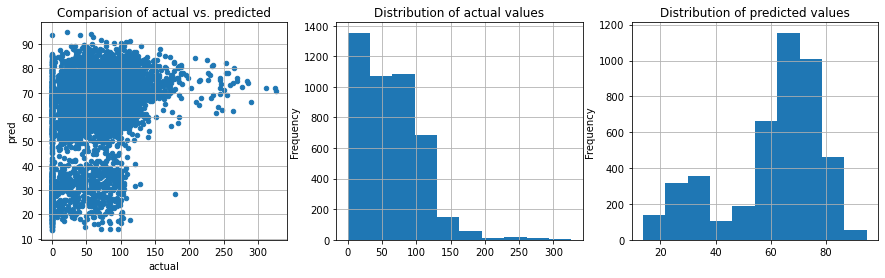

In [201]:
model_type = 'm5'
train_func, test_func = return_feature_functions(model_type)
train_final, test_final = train_func(), test_func()
check_model(train_final, test_final)

### Sixth Model (m6) -- Invalid 

#### Derive features 

In [ ]:
def gen_hourly_demand(df): 
    df_reshaped = df.pivot_table(index='hour', columns='date', values='demand')
    hourly_mean_demand = df_reshaped.shift(1, axis=1).rolling(window=5, axis=1).mean().stack().reset_index().sort_values(['date', 'hour']).rename(columns={0:'ma5_hourly_demand'})[['date', 'hour', 'ma5_hourly_demand']].reset_index(drop=True)
    
    return hourly_mean_demand

def derive_train_features_m6():
    train_final = load_training_data()
    train_final['year'] = train_final['date'].dt.year
    train_final['month'] = train_final['date'].dt.month
    train_final['day'] = train_final['date'].dt.day
    train_final['day_of_week'] = train_final['date'].dt.weekday
    train_final['quarter'] = train_final['date'].dt.quarter 
    train_final['is_weekday'] = np.where(train_final['day_of_week'].isin([6,7]), 1, 0)
    train_final['hour_type'] = train_final['hour'].apply(lambda x: assign_hour_type(x))
    train_final = pd.merge(train_final, gen_hourly_demand(train_final), on=['date', 'hour'])
    train_final = pd.get_dummies(train_final, columns=['hour_type'])
    
    return train_final

def derive_test_features_m6():
    test_final = load_testing_data()
    test_final['year'] = test_final['date'].dt.year
    test_final['month'] = test_final['date'].dt.month
    test_final['day'] = test_final['date'].dt.day
    test_final['day_of_week'] = test_final['date'].dt.weekday
    test_final['quarter'] = test_final['date'].dt.quarter 
    test_final['is_weekday'] = np.where(test_final['day_of_week'].isin([6,7]), 1, 0)
    test_final['hour_type'] = test_final['hour'].apply(lambda x: assign_hour_type(x))
    test_final = pd.merge(test_final, gen_hourly_demand(test_final), on=['date', 'hour'])
    test_final = pd.get_dummies(test_final, columns=['hour_type'])
    
    return test_final

#### Check model 

In [ ]:
model_type = 'm6'
train_func, test_func = return_feature_functions(model_type)
train_final, test_final = train_func(), test_func()
check_model(train_final, test_final)

### Seventh Model (m7)

#### Derive features

In [168]:
def assign_hour_type():
    df = load_training_data()
    hdf = df.groupby(['hour'])['demand'].mean().reset_index()
    p25 = np.percentile(hdf['demand'], 25)
    p50 = np.percentile(hdf['demand'], 50)
    p75 = np.percentile(hdf['demand'], 75)
    hdf['hour_type'] = hdf['demand'].apply(lambda x: apply_hour_type(x, p25, p50, p75))
    
    return hdf.drop(['demand'], axis=1).set_index('hour').to_dict()['hour_type']

def assign_month_type():
    df = load_training_data()
    df['month'] = df['date'].dt.month
    mdf = df.groupby(['month'])['demand'].mean().reset_index()
    p25 = np.percentile(mdf['demand'], 25)
    p50 = np.percentile(mdf['demand'], 50)
    p75 = np.percentile(mdf['demand'], 75)
    mdf['month_type'] = mdf['demand'].apply(lambda x: apply_month_type(x, p25, p50, p75))
    
    return mdf.drop(['demand'], axis=1).set_index('month').to_dict()['month_type']    
    
    
def derive_train_features_m7():
    train_final = load_training_data()
    train_final['year'] = train_final['date'].dt.year
    train_final['month'] = train_final['date'].dt.month
    train_final['day'] = train_final['date'].dt.day
    train_final['day_of_week'] = train_final['date'].dt.weekday
    train_final['quarter'] = train_final['date'].dt.quarter 
    train_final['hour_type'] = train_final['hour'].map(assign_hour_type())
    train_final['month_type'] = train_final['month'].map(assign_month_type())
    train_final = pd.get_dummies(train_final, columns=['hour_type', 'month_type'])
    
    return train_final

def derive_test_features_m7():
    test_final = load_testing_data()
    test_final['year'] = test_final['date'].dt.year
    test_final['month'] = test_final['date'].dt.month
    test_final['day'] = test_final['date'].dt.day
    test_final['day_of_week'] = test_final['date'].dt.weekday
    test_final['quarter'] = test_final['date'].dt.quarter 
    test_final['hour_type'] = test_final['hour'].map(assign_hour_type())
    test_final['month_type'] = test_final['month'].map(assign_month_type())
    test_final = pd.get_dummies(test_final, columns=['hour_type', 'month_type'])
    
    return test_final

#### Check model 

Mean squared error: 39.15751


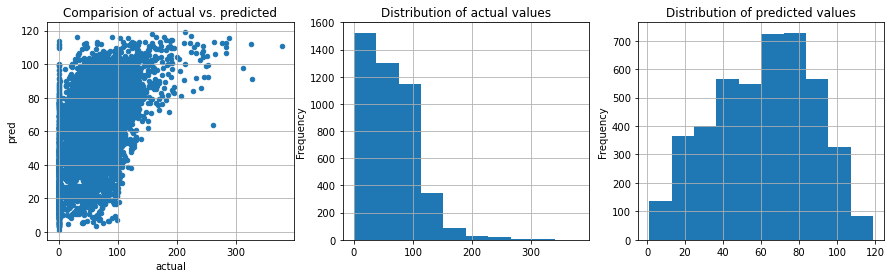

In [169]:
model_type = 'm7'
train_func, test_func = return_feature_functions(model_type)
train_final, test_final = train_func(), test_func()
check_model(train_final, test_final)

### Eighth model (m8)

#### Derive features 

In [174]:
def assign_hour_type():
    df = load_training_data()
    hdf = df.groupby(['hour'])['demand'].mean().reset_index()
    p25 = np.percentile(hdf['demand'], 25)
    p50 = np.percentile(hdf['demand'], 50)
    p75 = np.percentile(hdf['demand'], 75)
    hdf['hour_type'] = hdf['demand'].apply(lambda x: apply_hour_type(x, p25, p50, p75))
    
    return hdf.drop(['demand'], axis=1).set_index('hour').to_dict()['hour_type']

def assign_month_type():
    df = load_training_data()
    df['month'] = df['date'].dt.month
    mdf = df.groupby(['month'])['demand'].mean().reset_index()
    p25 = np.percentile(mdf['demand'], 25)
    p50 = np.percentile(mdf['demand'], 50)
    p75 = np.percentile(mdf['demand'], 75)
    mdf['month_type'] = mdf['demand'].apply(lambda x: apply_month_type(x, p25, p50, p75))
    
    return mdf.drop(['demand'], axis=1).set_index('month').to_dict()['month_type']    
    
    
def derive_train_features_m8():
    train_final = load_training_data()
    train_final['month'] = train_final['date'].dt.month
    train_final['day'] = train_final['date'].dt.day
    train_final['hour_type'] = train_final['hour'].map(assign_hour_type())
    train_final['month_type'] = train_final['month'].map(assign_month_type())
    train_final = pd.get_dummies(train_final, columns=['hour_type', 'month_type'])
    
    return train_final

def derive_test_features_m8():
    test_final = load_testing_data()
    test_final['month'] = test_final['date'].dt.month
    test_final['day'] = test_final['date'].dt.day
    test_final['hour_type'] = test_final['hour'].map(assign_hour_type())
    test_final['month_type'] = test_final['month'].map(assign_month_type())
    test_final = pd.get_dummies(test_final, columns=['hour_type', 'month_type'])
    
    return test_final

#### Check model 

Mean squared error: 39.75668


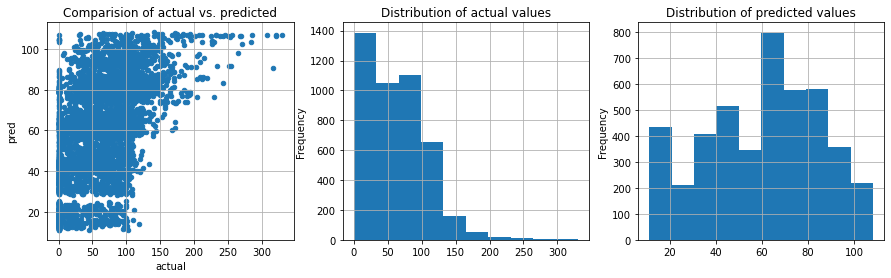

In [175]:
model_type = 'm8'
train_func, test_func = return_feature_functions(model_type)
train_final, test_final = train_func(), test_func()
check_model(train_final, test_final)

### Ninth Model (m9)

#### Derive features

In [190]:
   def assign_hour_type():
    df = load_training_data()
    hdf = df.groupby(['hour'])['demand'].mean().reset_index()
    p25 = np.percentile(hdf['demand'], 25)
    p50 = np.percentile(hdf['demand'], 50)
    p75 = np.percentile(hdf['demand'], 75)
    hdf['hour_type'] = hdf['demand'].apply(lambda x: apply_hour_type(x, p25, p50, p75))
    
    return hdf.drop(['demand'], axis=1).set_index('hour').to_dict()['hour_type']

def assign_month_type():
    df = load_training_data()
    df['month'] = df['date'].dt.month
    mdf = df.groupby(['month'])['demand'].mean().reset_index()
    p25 = np.percentile(mdf['demand'], 25)
    p50 = np.percentile(mdf['demand'], 50)
    p75 = np.percentile(mdf['demand'], 75)
    mdf['month_type'] = mdf['demand'].apply(lambda x: apply_month_type(x, p25, p50, p75))
    
    return mdf.drop(['demand'], axis=1).set_index('month').to_dict()['month_type']    
    
def assign_day_type():
    df = load_training_data()
    df['day_of_week'] = df['date'].dt.weekday
    ddf = df.groupby(['day_of_week'])['demand'].mean().reset_index()
    p25 = np.percentile(ddf['demand'], 25)
    p50 = np.percentile(ddf['demand'], 50)
    p75 = np.percentile(ddf['demand'], 75)
    ddf['day_type'] = ddf['demand'].apply(lambda x: apply_day_type(x, p25, p50, p75))
    
    return ddf.drop(['demand'], axis=1).set_index('day_of_week').to_dict()['day_type']    
    
    
def derive_train_features_m9():
    train_final = load_training_data()
    train_final['month'] = train_final['date'].dt.month
    train_final['day'] = train_final['date'].dt.day
    train_final['day_of_week'] = train_final['date'].dt.weekday
    train_final['hour_type'] = train_final['hour'].map(assign_hour_type())
    train_final['month_type'] = train_final['month'].map(assign_month_type())
    train_final['day_type'] = train_final['day_of_week'].map(assign_day_type())
    train_final = pd.get_dummies(train_final, columns=['hour_type', 'month_type', 'day_type'])
    
    return train_final

def derive_test_features_m9():
    test_final = load_testing_data()
    test_final['month'] = test_final['date'].dt.month
    test_final['day'] = test_final['date'].dt.day
    test_final['day_of_week'] = test_final['date'].dt.weekday
    test_final['hour_type'] = test_final['hour'].map(assign_hour_type())
    test_final['month_type'] = test_final['month'].map(assign_month_type())
    test_final['day_type'] = test_final['day_of_week'].map(assign_day_type())
    test_final = pd.get_dummies(test_final, columns=['hour_type', 'month_type', 'day_type'])
    
    return test_final

#### Check model 

Mean squared error: 39.09387


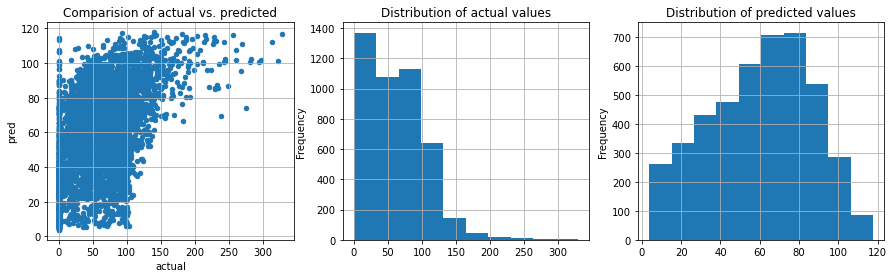

In [191]:
model_type = 'm9'
train_func, test_func = return_feature_functions(model_type)
train_final, test_final = train_func(), test_func()
check_model(train_final, test_final)

### Tenth Model (m10)

#### Derive features

In [196]:
def assign_hour_type():
    df = load_training_data()
    hdf = df.groupby(['hour'])['demand'].mean().reset_index()
    p25 = np.percentile(hdf['demand'], 25)
    p50 = np.percentile(hdf['demand'], 50)
    p75 = np.percentile(hdf['demand'], 75)
    hdf['hour_type'] = hdf['demand'].apply(lambda x: apply_hour_type(x, p25, p50, p75))
    
    return hdf.drop(['demand'], axis=1).set_index('hour').to_dict()['hour_type']

def assign_month_type():
    df = load_training_data()
    df['month'] = df['date'].dt.month
    mdf = df.groupby(['month'])['demand'].mean().reset_index()
    p25 = np.percentile(mdf['demand'], 25)
    p50 = np.percentile(mdf['demand'], 50)
    p75 = np.percentile(mdf['demand'], 75)
    mdf['month_type'] = mdf['demand'].apply(lambda x: apply_month_type(x, p25, p50, p75))
    
    return mdf.drop(['demand'], axis=1).set_index('month').to_dict()['month_type']    
    
def assign_day_type():
    df = load_training_data()
    df['day_of_week'] = df['date'].dt.weekday
    ddf = df.groupby(['day_of_week'])['demand'].mean().reset_index()
    p25 = np.percentile(ddf['demand'], 25)
    p50 = np.percentile(ddf['demand'], 50)
    p75 = np.percentile(ddf['demand'], 75)
    ddf['day_type'] = ddf['demand'].apply(lambda x: apply_day_type(x, p25, p50, p75))
    
    return ddf.drop(['demand'], axis=1).set_index('day_of_week').to_dict()['day_type']    
    
    
def derive_train_features_m10():
    train_final = load_training_data()
    train_final['year'] = train_final['date'].dt.year
    train_final['month'] = train_final['date'].dt.month
    train_final['day'] = train_final['date'].dt.day
    train_final['day_of_week'] = train_final['date'].dt.weekday
    train_final['hour_type'] = train_final['hour'].map(assign_hour_type())
    train_final['month_type'] = train_final['month'].map(assign_month_type())
    train_final['day_type'] = train_final['day_of_week'].map(assign_day_type())
    train_final = pd.get_dummies(train_final, columns=['hour_type', 'month_type', 'day_type'])
    
    return train_final

def derive_test_features_m10():
    test_final = load_testing_data()
    test_final['year'] = test_final['date'].dt.year
    test_final['month'] = test_final['date'].dt.month
    test_final['day'] = test_final['date'].dt.day
    test_final['day_of_week'] = test_final['date'].dt.weekday
    test_final['hour_type'] = test_final['hour'].map(assign_hour_type())
    test_final['month_type'] = test_final['month'].map(assign_month_type())
    test_final['day_type'] = test_final['day_of_week'].map(assign_day_type())
    test_final = pd.get_dummies(test_final, columns=['hour_type', 'month_type', 'day_type'])
    
    return test_final

#### Check model 

Mean squared error: 40.16217


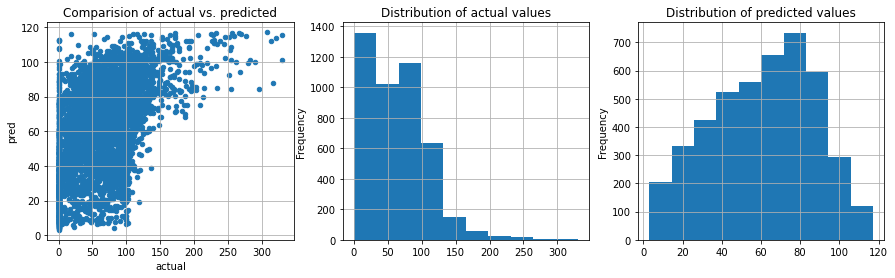

In [197]:
model_type = 'm10'
train_func, test_func = return_feature_functions(model_type)
train_final, test_final = train_func(), test_func()
check_model(train_final, test_final)